In [1]:
from skimage import io, color
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plot_comparison(original, operation, operation_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax2.imshow(operation, cmap=plt.cm.gray)
    ax2.set_title(operation_name)

In [3]:
def erosionFunc(img,kernel):
    img1 = np.zeros(img.shape)
    kernelRowCenter = kernel.shape[0]//2
    kernelColumnCenter = kernel.shape[1]//2
    for i in range(kernelRowCenter, img.shape[0]-kernelRowCenter):
        for j in range(kernelColumnCenter, img.shape[1]-kernelColumnCenter):
            img1[i][j] = img[i-kernelRowCenter:i+kernelRowCenter+1,j-kernelColumnCenter:j+kernelColumnCenter+1].min()
                    
    return img1

In [4]:
def dilationFunc(img,kernel):
    img1 = np.zeros(img.shape)
    kernelRowCenter = kernel.shape[0]//2
    kernelColumnCenter = kernel.shape[1]//2
    for i in range(kernelRowCenter, img.shape[0]-kernelRowCenter):
        for j in range(kernelColumnCenter, img.shape[1]-kernelColumnCenter):
            img1[i][j] = img[i-kernelRowCenter:i+kernelRowCenter+1,j-kernelColumnCenter:j+kernelColumnCenter+1].max()
    return img1

In [5]:
def closingFunc(img, kernel):
    return(erosionFunc(dilationFunc(img, kernel), kernel))

In [6]:
def openingFunc(img, kernel):
    return(dilationFunc(erosionFunc(img, kernel), kernel))

In [7]:
def binarize(img, threshold):
    for i in range(0,img.shape[0]-1):
        for j in range(0,img.shape[1]-1):
            if img[i][j] >= threshold:
                img[i][j] = 1
            else:
                img[i][j] = 0
    return img

# Task 1

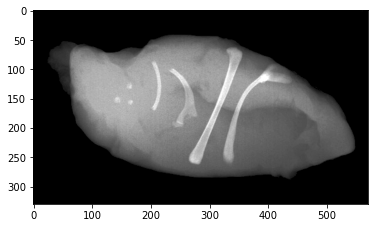

In [8]:
img = io.imread('chicken_filet_test.jpg')
img = color.rgb2gray(img)
plt.imshow(img, cmap=plt.cm.gray)

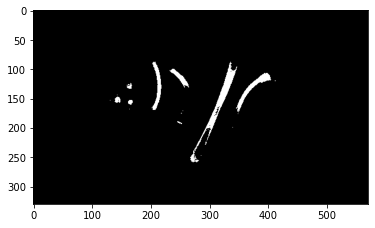

In [9]:
binary = binarize(img, 0.77)
plt.imshow(binary,'gray',vmin=0, vmax=1)

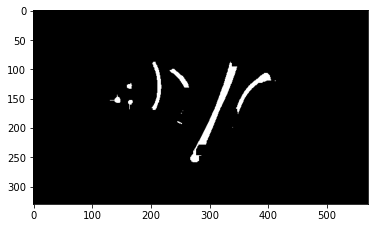

In [10]:
closedBinary = closingFunc(binary, np.ones((11,11)))
plt.imshow(closedBinary, 'gray',vmin=0, vmax=1)

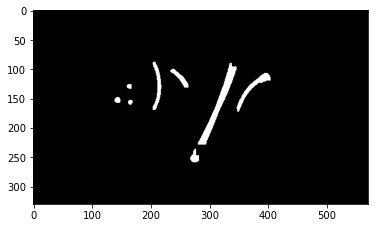

In [11]:
openedBinary = openingFunc(closedBinary, np.ones((3,3)))
plt.imshow(openedBinary,'gray',vmin=0, vmax=1)

In [12]:
def connectedComponents(img):

    img1 = np.zeros(img.shape)
    img = img.astype(int)
    img1 = img1.astype(int)
    dict = {}
    label = 0
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            if img[i][j] == 1:
                img1[i][j] = img[i][j]
                while(True):
                    img2 = dilationFunc(img1, np.ones((3,3)))
                    img2 = img2.astype(int)
                    if (img1 == img2 & img).all():
                        dict.update({label:[]})
                        for x in range(img2.shape[0]-1):
                            for y in range(img2.shape[1]-1):
                                if img2[x][y] == 1 and (x,y) not in dict[label]:
                                    dict[label].append((x,y))
                                    
                        label+=1
                        img = img - img1
                        img2 = np.zeros(img.shape)
                        break
                    img1 = img2 & img
    return dict

In [13]:
dict  = connectedComponents(openedBinary)

In [14]:
imtest0 = np.zeros(img.shape)
imtest1 = np.zeros(img.shape)
imtest2 = np.zeros(img.shape)
imtest3 = np.zeros(img.shape)
imtest4 = np.zeros(img.shape)
imtest5 = np.zeros(img.shape)
imtest6 = np.zeros(img.shape)
imtest7 = np.zeros(img.shape)

In [15]:
#print (dict[0])
#for key, value in dict.items():
for i in range(imtest0.shape[0]-1):
    for j in range(imtest0.shape[1]-1):
        for k in range(0, len(dict[0])):
            if (i, j) == dict[0][k]:
                imtest0[i][j] = 255

In [16]:
for i in range(imtest1.shape[0]-1):
    for j in range(imtest1.shape[1]-1):
        for k in range(0, len(dict[1])):
            if (i, j) == dict[1][k]:
                imtest1[i][j] = 255

In [17]:
for i in range(imtest2.shape[0]-1):
    for j in range(imtest2.shape[1]-1):
        for k in range(0, len(dict[2])):
            if (i, j) == dict[2][k]:
                imtest2[i][j] = 255

In [18]:
for i in range(imtest3.shape[0]-1):
    for j in range(imtest3.shape[1]-1):
        for k in range(0, len(dict[3])):
            if (i, j) == dict[3][k]:
                imtest3[i][j] = 255

In [19]:
for i in range(imtest4.shape[0]-1):
    for j in range(imtest4.shape[1]-1):
        for k in range(0, len(dict[4])):
            if (i, j) == dict[4][k]:
                imtest4[i][j] = 255

In [20]:
for i in range(imtest5.shape[0]-1):
    for j in range(imtest5.shape[1]-1):
        for k in range(0, len(dict[5])):
            if (i, j) == dict[5][k]:
                imtest5[i][j] = 255

In [21]:
for i in range(imtest6.shape[0]-1):
    for j in range(imtest6.shape[1]-1):
        for k in range(0, len(dict[6])):
            if (i, j) == dict[6][k]:
                imtest6[i][j] = 255

In [22]:
for i in range(imtest7.shape[0]-1):
    for j in range(imtest7.shape[1]-1):
        for k in range(0, len(dict[7])):
            if (i, j) == dict[7][k]:
                imtest7[i][j] = 255

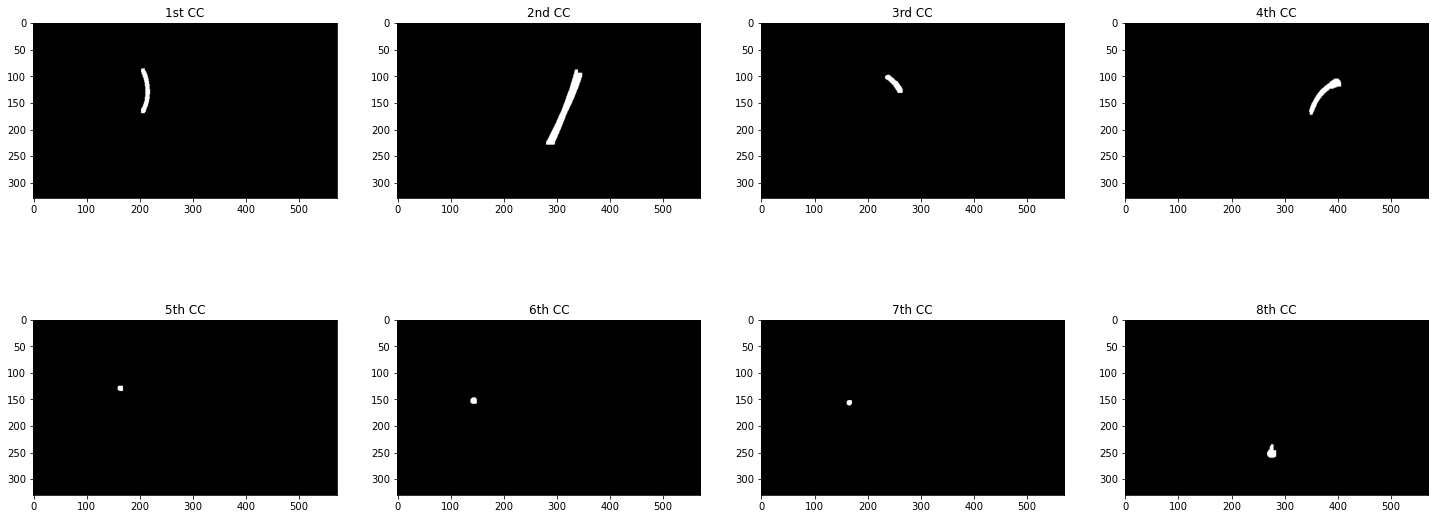

In [23]:
figure, axis = plt.subplots(2, 4)

figure.set_size_inches(25, 10)

axis[0, 0].imshow(imtest0, cmap=plt.cm.gray)
axis[0, 0].set_title("1st CC")

axis[0, 1].imshow(imtest1, cmap=plt.cm.gray)
axis[0, 1].set_title("2nd CC")

axis[0, 2].imshow(imtest2, cmap=plt.cm.gray)
axis[0, 2].set_title("3rd CC")

axis[0, 3].imshow(imtest3, cmap=plt.cm.gray)
axis[0, 3].set_title("4th CC")

axis[1, 0].imshow(imtest4, cmap=plt.cm.gray)
axis[1, 0].set_title("5th CC")

axis[1, 1].imshow(imtest5, cmap=plt.cm.gray)
axis[1, 1].set_title("6th CC")

axis[1, 2].imshow(imtest6, cmap=plt.cm.gray)
axis[1, 2].set_title("7th CC")

axis[1, 3].imshow(imtest7, cmap=plt.cm.gray)
axis[1, 3].set_title("8th CC")

plt.show()
